# 몬테카르를로법 기초

## 분포 모델과 샘플 모델

In [8]:
import numpy as np

def sample(dices=2):
    x = 0
    for _ in range(dices):
        x += np.random.choice([1,2,3,4,5,6])
    return x

In [12]:
sample()

2

## 몬테카를로법 구현

In [23]:
trial = 1000

samples = []

for _ in range(trial):
    s = sample()
    samples.append(s)

V = sum(samples) / len(samples)
print(V)

6.915


In [28]:
trial = 10000

samples = []

for _ in range(trial):
    s = sample()
    samples.append(s)
    V = sum(samples) / len(samples)
    if len(samples) % 1000 == 0:
        print(V)

6.899
6.9455
6.95
6.91925
6.9558
6.9785
6.991
6.99375
7.003555555555556
7.0114


In [31]:
trial = 10000
V, n = 0, 0

for _ in range(trial):
    s = sample()
    n += 1
    V += (s-V)/n
    if n % 1000 == 0:
        print(V)    

7.0740000000000025
7.041000000000004
7.081666666666665
7.041
6.997400000000007
6.987500000000003
6.960142857142859
6.957625
6.970222222222215
6.966799999999992


# 몬테카를로법 구현

## step() 메서드

In [33]:
from common.gridworld import GridWorld

env = GridWorld()
action = 0
next_state, reward, done = env.step(action)

print(next_state)
print(reward)
print(done)

(1, 0)
0
False


In [39]:
env = GridWorld()
state = env.reset()
state

(2, 0)

## 에이전트 클래스 구현

In [47]:
from collections import defaultdict

class RandomAgent():
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4
        random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
        self.pi = defaultdict(lambda:random_actions)
        self.V = defaultdict(lambda:0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def eval(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma*G + reward
            self.cnts[state] += 1
            self.V[state] += (G - self.V[state]) / self.cnts[state]

## 몬테카를로법 실행

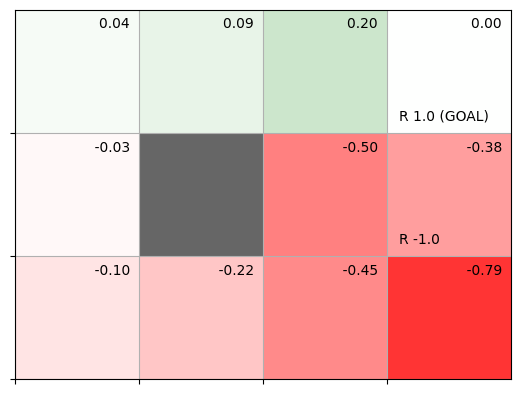

In [50]:
env = GridWorld()
agent = RandomAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.add(state, action, reward)
        if done:
            agent.eval()
            break
        state = next_state
        
env.render_v(agent.V)

# 몬테카를로법으로 정책 제어하기

## 몬테카를로법으로 정책 제어 구현

In [3]:
def greedy_probs(Q, state, action_size=4):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)
    action_probs = {action:0.0 for action in range(action_size)}
    action_probs[max_action] = 1
    return action_probs
    
class MyAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4
        random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
        self.pi = defaultdict(lambda : random_actions)
        delf.Q = defaultdict(lambda:0)
        self.cnts = defaultdict(lambda:0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def update(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma*G + reward
            key = (state, action)
            self.cnts[key] += 1
            self.Q[key] += (G - self.Q[key]) / self.cnt[key]
            self.pi[state] = greedy_probs(self.Q, state)

## $\epsilon$-탐욕 정책으로 변경

In [4]:
def greedy_probs(Q, state, epsilon=0, action_size=4):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)

    base_prob = epsilon / action_size
    action_probs = {action:base_prob for action in range(action_size)}
    action_probs[max_action] += (1 - epsilon)
    return action_probs

## 고정값 $\alpha$ 방식으로 수행

In [ ]:
alpha = 0.1
Q[key] += (g - Q[key])*alpha

## 몬테카를로법으로 정책 반복법 구현(개선 버전)

In [12]:
from common.gridworld import GridWorld
from collections import defaultdict
import numpy as np

def greedy_probs(Q, state, epsilon=0, action_size=4):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)

    base_prob = epsilon / action_size
    action_probs = {action:base_prob for action in range(action_size)}
    action_probs[max_action] += (1 - epsilon)
    return action_probs


class MyAgent:
    def __init__(self):
        self.gamma = 0.9
        self.epsilon = 0.1
        self.alpha = 0.1
        self.action_size = 4
        
        random_actions = {0:0.25, 1:0.25, 2:0.25, 3:0.25}
        self.pi = defaultdict(lambda : random_actions)
        self.Q = defaultdict(lambda:0)
        # self.cnts = defaultdict(lambda:0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.pi[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        self.memory.clear()

    def update(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = self.gamma*G + reward
            key = (state, action)
            # self.cnts[key] += 1
            # self.Q[key] += (G - self.Q[key]) / self.cnt[key]
            self.Q[key] += (G - self.Q[key]) * self.alpha
            self.pi[state] = greedy_probs(self.Q, state, self.epsilon)


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6292.09it/s]


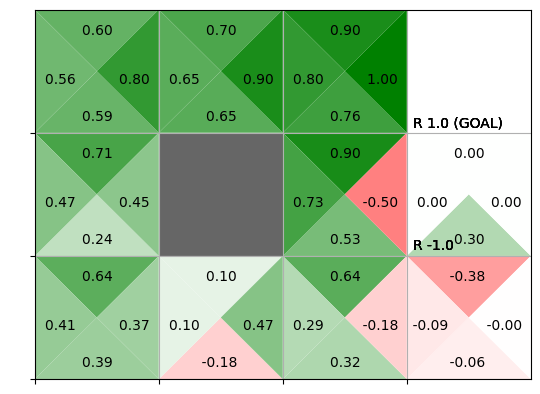

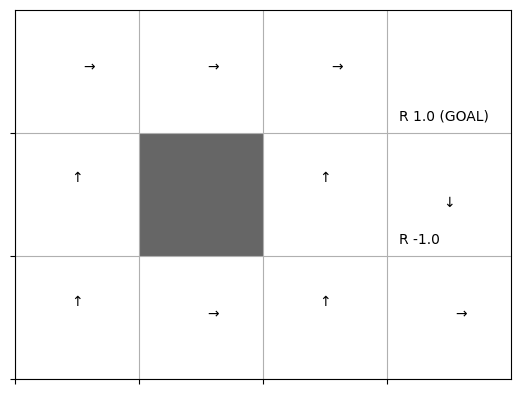

In [13]:
from tqdm import tqdm

env = GridWorld()
agent = MyAgent()

episodes = 10000
for episode in tqdm(range(episodes)):
    state = env.reset()
    agent.reset()
    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.add(state, action,reward)
        if done:
            agent.update()
            break
        state = next_state

env.render_q(agent.Q)

# 오프-정책과 중요도 샘플링

## 중요도 샘플링

In [15]:
import numpy as np

x = np.array([1,2,3])
pi = np.array([0.1, 0.1, 0.8])

e = np.sum(x*pi)
print(f'참값 (E_pi[x]) : ', e)

참값 (E_pi[x]) :  2.7


In [19]:
n = 100
samples = []
for _ in range(n):
    s = np.random.choice(x, p = pi)
    samples.append(s)
mean = np.mean(samples)    
var = np.var(samples)
print(f'몬테카를로법: {mean:.2f}, 분산 : {var:.2f}')

몬테카를로법: 2.73, 분산 : 0.38


In [20]:
b = np.array([1/3, 1/3, 1/3])
n = 100
samples = []

for _ in range(n):
    idx = np.arange(len(b))
    i = np.random.choice(idx, p=b)
    s = x[i]
    rho = pi[i] / b[i]
    samples.append(rho * s)

mean = np.mean(samples)    
var = np.var(samples)
print(f'중요도 샘플링: {mean:.2f}, 분산 : {var:.2f}')

중요도 샘플링: 2.54, 분산 : 9.77
